Prisustvo odudarajućih podataka vrlo utiče na formu rešenja modela linearne regresije. Sledeći primer to ilustruje i ukazuje na neke tehnike detekcije i eliminacije odudarajućih podataka.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from sklearn import linear_model
from sklearn import metrics

In [4]:
np.random.seed(7)

Skup podataka koji ćemo generisati imaće ukupno 49 instanci. Veza između nezavisne i zavisne promenljive će biti oblika $y=3+2x$ uz dodatak šuma iz normalne raspodele. 

In [5]:
N = 49
x = np.random.randn(N)
y = 3 + 2*x + np.random.randn(N)

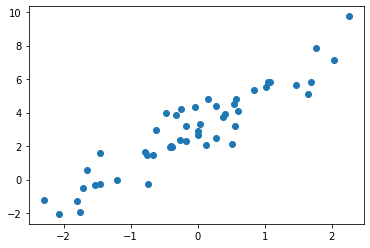

array([[ 1.69052570e+00,  5.85644679e+00],
       [-4.65937371e-01,  3.98014412e+00],
       [ 3.28201637e-02,  3.30294217e+00],
       [ 4.07516283e-01,  3.91646655e+00],
       [-7.88923029e-01,  1.67473168e+00],
       [ 2.06557291e-03,  2.87175395e+00],
       [-8.90385858e-04,  2.68874289e+00],
       [-1.75472431e+00, -1.94441208e+00],
       [ 1.01765801e+00,  5.53694013e+00],
       [ 6.00498516e-01,  4.10622158e+00],
       [-6.25428974e-01,  2.94222797e+00],
       [-1.71548261e-01,  2.28808501e+00],
       [ 5.05299374e-01,  2.10422887e+00],
       [-2.61356415e-01,  2.37767654e+00],
       [-2.42749079e-01,  4.21403914e+00],
       [-1.45324141e+00, -2.89905948e-01],
       [ 5.54580312e-01,  3.21930376e+00],
       [ 1.23880905e-01,  2.05416989e+00],
       [ 2.74459924e-01,  2.49890304e+00],
       [-1.52652453e+00, -3.53242801e-01],
       [ 1.65069969e+00,  5.12141729e+00],
       [ 1.54335535e-01,  4.80631019e+00],
       [-3.87139943e-01,  1.94308488e+00],
       [ 2.

In [23]:
plt.scatter(x, y)
plt.show()
data = np.vstack((x,y)).T

In [26]:
df = pd.DataFrame(data,columns=["X","Y"])
df.head()

,X,Y
0,1.690526,5.856447
1,-0.465937,3.980144
2,0.032820,3.302942
3,0.407516,3.916467
4,-0.788923,1.674732


Dalje ćemo odrediti i grafički prikazati model linearne regresije koji aproksimira ovaj skup tačaka.

In [28]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1,1))
beta0, beta1 = model.intercept_, model.coef_[0]

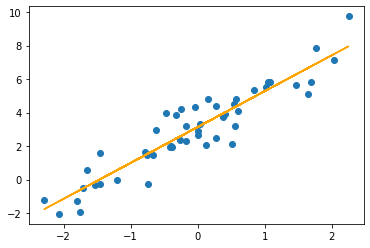

In [29]:
plt.scatter(x, y)
plt.plot(x, beta0+beta1*x, color = 'orange')
plt.show()

U naš skup ubacićemo na slučajan način nekoliko odudarajućih podataka. Broj odudarajućih podataka će biti predstavljan parametrom $k$.

In [30]:
k = 4
outlier_indexes = np.random.choice(np.arange(0, N), k) # from the given set(array) pick up k random elements

Za izdvojene instance ćemo udvostručiti vrednost ciljne promenljive.

In [32]:
y_with_outliers = y.copy()
y_with_outliers[outlier_indexes] *= 2
x_with_outliers=x.copy()
x[outlier_indexes]

array([ 1.04939655,  0.55458031,  0.00206557, -0.66215934])

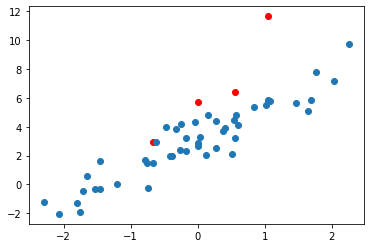

In [36]:
plt.scatter(x[outlier_indexes],y_with_outliers[outlier_indexes], c="r")
plt.scatter(x, y)


Potom ćemo nad novim skupom odredi i grafički prikazati model linearne regresije.

In [10]:
model_with_outliers = linear_model.LinearRegression()
model_with_outliers.fit(x.reshape(-1, 1), y_with_outliers)
beta0_with_outliers, beta1_with_outliers = model_with_outliers.intercept_, model_with_outliers.coef_[0]

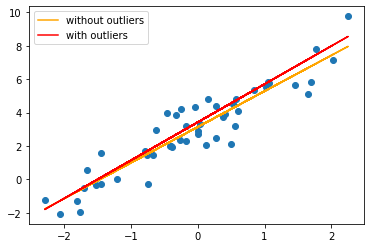

In [11]:
plt.scatter(x, y)
plt.plot(x, beta0+beta1*x, color = 'orange', label = 'without outliers')
plt.plot(x, beta0_with_outliers+beta1_with_outliers*x, color = 'red', label = 'with outliers')
plt.legend(loc = 'best')
plt.show()

Kao što možemo da vidimo, prisustvo odudarajućih podataka je uticalo na promenu koeficijenata modela. Veće vrednosti odudarajućih podataka bi još više uticale na ovu promenu. 

Jedan od načina da se ispita postojanje odudarajućih podataka je iscrtavanje skupa vrednosti u formi grafika-kutije (eng. boxplot). Ovaj grafik koristi medijanu skupa vrednosti (Q2), donji (Q1) i gornji (Q3) kvartil i na osnovu njih izračunava dopustive donje i gornje vrednosti. Vrednosti koje prevazilaze ove opsege se mogu smatrati odudarajućim vrednostima. 

<img src='assets/boxplot.png'>

Za iscrtavanje grafika kutije, može se iskoristiti boxplot funkcija `matplotlib` biblioteke (ili istoimena funkcija `pandas` biblioteke).

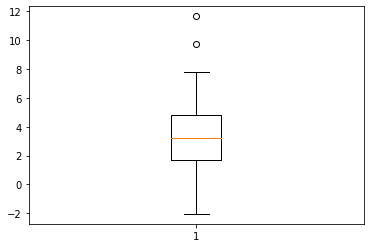

In [12]:
plt.boxplot(y_with_outliers)
plt.show()

Sa grafika možemo videti da se dve vrednosti u skupu smatraju odudarajućima.

Dalje ćemo računski odrediti gornje i donje dopustive opsege za vrednosti ciljne promenljive. 

In [39]:
y_sorted = y_with_outliers.copy()
y_sorted.sort()

Određujemo medijanu, donji i gornji kvartil:

In [40]:
# medijana 
Q2_index = int(N/2)
Q2 = y_sorted[Q2_index]
print('Q2: ', Q2_index, Q2)

Q2:  24 3.188772317273629


In [41]:
# donji kvartil
Q1_index = int(N/4)
Q1 = y_sorted[Q1_index]
print('Q1: ', Q1_index, Q1)

Q1:  12 1.6747316783038404


In [42]:
# gornji kvartil
Q3_index = int(3*N/4)
Q3 = y_sorted[Q3_index]
print('Q3: ', Q3_index, Q3)

Q3:  36 4.81275276421185


Zatim određujemo interkvartilni opseg:

In [43]:
IQR = Q3 - Q1 
print('IQR: ', IQR)

IQR:  3.1380210859080098


I na kraju, dopistive donje i gornje granice:

In [44]:
lower_limit = Q1 - 1.5*IQR
print('Donja granica: ', lower_limit)

Donja granica:  -3.0322999505581745


In [45]:
upper_limit = Q3 + 1.5*IQR
print('Gornja granica: ', upper_limit)

Gornja granica:  9.519784393073865


Ostalo je još da izdvojimo vrednosti koje smatramo odudarajućim podacima, kao i njihove indekse zarad daljeg ispitivanja i potencijalnog brisanja iz skupa.

In [46]:
outliers_below_lower_limit = y_with_outliers[y_with_outliers < lower_limit]

In [47]:
outliers_below_lower_limit

array([], dtype=float64)

In [48]:
outliers_above_upper_limit = y_with_outliers[y_with_outliers > upper_limit]

In [53]:
outliers_above_upper_limit.

array([11.66763937,  9.75513709])

In [50]:
outliers_above_upper_limit_indexes = np.where(y_with_outliers > upper_limit)# the function "np.where" was used with a mask and returned indexes

In [51]:
outliers_above_upper_limit_indexes

(array([28, 47], dtype=int64),)

In [26]:
all_outliers = np.concatenate((outliers_below_lower_limit, outliers_above_upper_limit), axis = 0)

In [27]:
print('All outliers: ', all_outliers )

All outliers:  [11.66763937  9.75513709]


Za pregled još nekih interesantnih tehnika izdvajanja odudarajućih podataka preporučujemo [ovaj blog](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623).